In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [24]:
trainfile="~/train.csv"
test_file='~/test.csv'
valid_file='~/val.csv'

train_set=pd.read_csv(trainfile,header=None)
test_set=pd.read_csv(test_file, header=None)
valid_set=pd.read_csv(valid_file, header=None)

In [25]:
train_set.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [26]:
train_set.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.770000e+02,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,1.017602e+06,4.410901,3.029350,3.115304,2.742138,3.297694,3.639413,3.316562,2.897275,1.687631,2.700210
std,2.853428e+05,2.910956,2.909557,2.861898,2.766578,2.331609,3.659906,2.162126,3.009078,1.833659,0.955007
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.464230e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.152331e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.207986e+06,6.000000,4.000000,5.000000,3.000000,4.000000,7.000000,4.000000,4.000000,1.000000,4.000000
max,1.320304e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [27]:
# lets take clump_thick and uniform_cell_size 
X=train_set.iloc[:,[2,3]].values
#X

In [28]:
X.shape[0] # no of training eg or rows

477

In [29]:
X.shape[1] # 2 columns or features

2

In [30]:
m=X.shape[0]
n=X.shape[1]

In [31]:
# Choose no of iterations to find convergence
n_iter=100

In [35]:
# random choose k or no of clusters
k=5

In [36]:
# initialize random centroids from data
centroids=np.array([]).reshape(n,0)

In [37]:
import random
# n x k centroids, each column is a centroid for a cluster
for i in range(k):
    rand=random.randint(0,m-1)
    centroids=np.c_[centroids,X[rand]]

In [38]:
# result a dictionary with cluster no as keys and data points as values
# key-value pairs
# index of a column in vector V
result={}
# calculate euclidean distance from each point to centroids and store in mk matrix

distance=np.array([]).reshape(m,0)
for j in range(k):
    temp_distance=np.sum((X-centroids[:,j])**2,axis=1)
    distance=np.c_[distance,temp_distance]
V=np.argmin(distance,axis=1)+1


In [39]:
V

array([2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [40]:
# store regrouped data points based on cluster index V
# and compute MEAN of separated clusters and assign a new centroids

temp_dict={}
for j in range(k):
    temp_dict[j+1]=np.array([]).reshape(2,0)
for i in range(m):
    temp_dict[V[i]]=np.c_[temp_dict[V[i]],X[i]]
for j in range(k):
    temp_dict[j+1]=temp_dict[j+1].T
for j in range(k):
    centroids[:,j]=np.mean(temp_dict[j+1],axis=0)


In [41]:
# to achieve convergence, loop over iteration and repeat previous steps
for i in range(n_iter):
    distance=np.array([]).reshape(m,0)
    for j in range(k):
        temp_distance=np.sum(X-centroids[:,j]**2,axis=1)
        distance=np.c_[distance,temp_distance]
    V=np.argmin(distance,axis=1)+1
    temp_dict={}
    for j in range(k):
        temp_dict[j+1]=np.array([]).reshape(2,0)
    for i in range(m):
        temp_dict[V[i]]=np.c_[temp_dict[V[i]],X[i]]
    for j in range(k):
        temp_dict[j+1]=temp_dict[j+1].T
    for j in range(k):
        centroids[:,j]=np.mean(temp_dict[j+1],axis=0)
    result=temp_dict
    

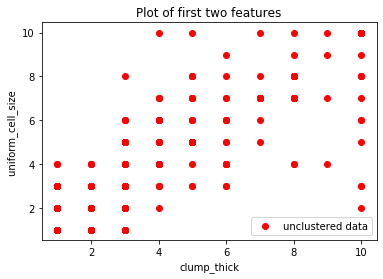

In [42]:
plt.scatter(X[:,0],X[:,1],c='red',label='unclustered data')
plt.xlabel('clump_thick')
plt.ylabel('uniform_cell_size ')
plt.legend()
plt.title('Plot of first two features')
plt.show()

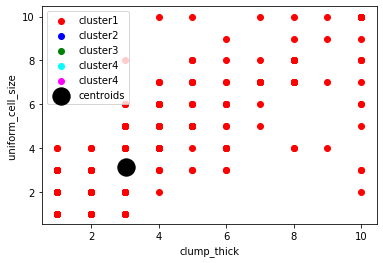

In [44]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster4','cluster5']
for i in range(k):
    plt.scatter(result[i+1][:,0],result[i+1][:,1],c=color[i],label=labels[i])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='black',label='centroids')
plt.xlabel('clump_thick')
plt.ylabel('uniform_cell_size ')
plt.legend()
plt.show()

In [60]:
# define Kmeans class
import random as rd
class KMeans:
    def __init__(self,X,k):
        self.X=X
        self.result={}
        self.centroids=np.array([]).reshape(self.X.shape[1],0)
        self.k=k
        self.m=self.X.shape[0]
        
    def kmeansplusplus(self,X,k):
        i=rd.randint(0,X.shape[0])
        centroid_temp=np.array([X[i]])
        for n in range(1,k):
            D=np.array([])
            for x in X:
                D=np.append(D,np.min(np.sum((x-centroid_temp)**2)))
            prob=D/np.sum(D)
            total_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(total_prob):
                if r<p:
                    i=j
                    break
            centroid_temp=np.append(centroid_temp,[X[i]],axis=0)
        return centroid_temp.T
        
    def fit(self,n_iter):
        self.centroids=self.kmeansplusplus(self.X,self.k)
#         for i in range(self.k):
#             rand=random.randint(0,self.m-1)
#             self.centroids=np.c_[self.centroids,self.X[rand]]
        for n in range(n_iter):
            distance=np.array([]).reshape(self.m,0)
            for j in range(self.k):
                temp_distance=np.sum(self.X-self.centroids[:,j]**2,axis=1)
                distance=np.c_[distance,temp_distance]
            V=np.argmin(distance,axis=1)+1
            temp_dict={}
            for j in range(self.k):
                temp_dict[j+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                temp_dict[V[i]]=np.c_[temp_dict[V[i]],self.X[i]]
            for j in range(self.k):
                temp_dict[j+1]=temp_dict[j+1].T
            for j in range(self.k):
                self.centroids[:,j]=np.mean(temp_dict[j+1],axis=0)
            self.result=temp_dict
            
    def predict(self):
        return self.result,self.centroids.T
    
    def WCSS(self):
        wcss=0
        for i in range(self.k):
            wcss+=np.sum(self.result[i+1]-self.centroids[:,i])**2
        return wcss
            

In [61]:
# elbow method to find optimal number of clusters k
m=X.shape[0]
n_iter=100

In [62]:
#from KMeans import KMeans

In [63]:
WCSS_array=np.array([])
for k in range(1,11):
    kmeans=KMeans(X,k)
    kmeans.fit(n_iter)
    result,centroids=kmeans.predict()
    wcss=0
    for i in range(k):
        wcss+=np.sum((result[i+1]-centroids[i,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)  

In [ ]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of clusters')
plt.ylabel('within cluster Sum of Squares ')
plt.title('Elbow method to determine optimal no of clusters')
plt.show()

In [66]:
k=5
kmeans=KMeans(X,k)
kmeans.fit(n_iter)
result,centroids=kmeans.predict()

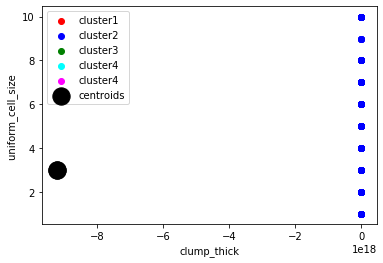

In [67]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster4','cluster5']
for i in range(k):
    plt.scatter(result[i+1][:,0],result[i+1][:,1],c=color[i],label=labels[i])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='black',label='centroids')

plt.xlabel('clump_thick')
plt.ylabel('uniform_cell_size ')
plt.legend()
plt.show()